## **Statistical Learning – Data science - 2021/22 – Exercise 6 – 07/06/2022**
# **Exercise 6: Prediction of house value: the California housing dataset – regression with Artificial Neural Networks**

In [1]:
# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import random as rnd

# visualization
import matplotlib.pyplot as plt
# %matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import  Sequential
from keras.layers.core import Dense
import keras.metrics as metrics


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/californiahousingdataset/train.csv
/kaggle/input/californiahousingdataset/test.csv


## **1. Browse the Keras library (tutorial and documentation cited in the slides)**
> <h2> ✅ </h2>

## **2. Load the California housing dataset**

### Some info about the dataset:

* \#samples-istances: 20640
* variables: 8 numeric predictors, 1 target
    * ### **Predictors:**
        * **MedInc (mi):** median income in block
        * **HouseAge (ha):** median house age in block
        * **AveRooms (ar):** average number of rooms
        * **AveBedrms (ab):** average number of bedrooms
        * **Population (p):** block population
        * **AveOccup (ao):** average house occupancy
        * **Latitude (lt):** house block latitude
        * **Longitude (lg):** house block longitude
    * ### **Response:**
        * **Target (v):** median house value for California districts

* Missing values: none

# **Data Acquisition**

In [2]:
# Load the California Housing dataset
df_train = pd.read_csv('../input/californiahousingdataset/train.csv',sep=',')
df_test = pd.read_csv('../input/californiahousingdataset/test.csv',sep=',')

In [3]:
# Some stats
print(f"We have {df_train.shape[0] + df_test.shape[0]} observation, splitted into:\n\
      * {df_train.shape[0]} training observations;\n\
      * {df_test.shape[0]} test observations.\n\
There are {df_train.isna().sum().sum() + df_test.isna().sum().sum()} missing values in the dataset.")

We have 20640 observation, splitted into:
      * 16385 training observations;
      * 4255 test observations.
There are 0 missing values in the dataset.


# **Data pre-processing**

In [4]:
# Drop an useless feature
df_train = df_train.drop(columns='Unnamed: 0');
df_test = df_test.drop(columns='Unnamed: 0');

In [5]:
df_train

,mi,ha,ar,ab,p,ao,lt,lg,v
0,5.8735,35.0,5.811639,1.056662,1521.0,2.329250,34.11,-118.63,4.48100
1,1.4688,8.0,10.000000,1.916667,63.0,2.625000,33.32,-115.98,0.53800
2,2.1603,28.0,4.808173,0.995460,2008.0,2.279228,38.74,-120.78,1.11300
3,4.7404,43.0,5.855140,1.009346,967.0,2.259346,37.58,-122.37,5.00001
4,3.2617,10.0,3.929142,1.051896,2032.0,2.027944,37.45,-121.92,2.52200
...,...,...,...,...,...,...,...,...,...
16380,5.0427,22.0,6.405405,1.009828,1216.0,2.987715,38.55,-121.35,1.26900
16381,4.7396,25.0,5.453390,0.949153,727.0,3.080508,38.73,-121.44,1.35500
16382,5.0839,25.0,6.039216,1.150980,1558.0,3.054902,34.73,-118.61,1.56700
16383,5.5292,16.0,6.875000,1.015086,1414.0,3.047414,34.11,-117.68,2.08600


### **Split the dataset into Training and Test sets**

In [6]:
# Training set
predictorsTrain = df_train.loc[:, df_train.columns != 'v']
responseTrain = df_train['v']

# Test set
predictorsTest = df_test.loc[:, df_train.columns != 'v']
responseTest = df_test['v']

### **Standardization**

In [7]:
# Standardize "predictorsTrain"
predictorsTrainMeans = predictorsTrain.mean()
predictorsTrainStds = predictorsTrain.std()
predictorsTrain_std = (predictorsTrain - predictorsTrainMeans)/predictorsTrainStds # standardized variables of predictorTrain

# Standardize "predictorsTest" (using the mean and std of predictorsTrain, it's better!)
predictorsTest_std = (predictorsTest - predictorsTrainMeans)/predictorsTrainStds # standardized variables of predictorTest

### **Split the training set into Train and Validation sets for the fitting**

Splitting the dataset is essential for an unbiased evaluation of prediction performance. In most cases, it’s enough to split your dataset randomly into three subsets:

* The **training set** is applied to train, or fit, your model. For example, you use the training set to find the optimal coefficients for linear regression.

* The **validation set** is used for unbiased model evaluation during hyperparameter tuning. For example, when you want to find the optimal number of neurons in a neural network, you experiment with different values. For each considered setting of hyperparameters, you fit the model with the training set and assess its performance with the validation set.

* The **test set** is needed for an unbiased evaluation of the final model. Don't use it for fitting or validation.

I choosed to split the train set in two parts:\
a small fraction (20%) became the validation set which the model is evaluated and the rest (80%) is used to train the model.

In [8]:
# Set the random seed
random_seed = 3 # a random_state parameter may be provided to control the random number generator used

In [9]:
# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(predictorsTrain_std, responseTrain, test_size = 0.2, random_state = random_seed)

In [10]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((13108, 8), (13108,), (3277, 8), (3277,))

### **Rename the data**

In [11]:
# Rename our data

## Training set - already done it above when I created the validation set
# X_train = X_train
# X_val = X_val
# y_train = y_train
# y_val = y_val

## Test set
X_test = predictorsTest_std
y_test = responseTest

In [12]:
# # Since Keras models are trained on Numpy arrays of input data and labels:

# # Training set
# # X_train = X_train.values
# # X_val = X_val.values
# # y_train = y_train.values
# # y_val = y_val.values

# # Test set
# X_test = X_test.values
# y_test = y_test.values

<div class="alert alert-warning" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Warning: Converting data into Numpy arrays makes the fitting process very slower!
            </strong>
        </div>   
    </div> 
</div>

## **3. Generate the artificial neural network model analyzed in this slides and compare the results obtained by structures defined below**

### **Create the ANN**

Lets create a simple model from Keras Sequential layer:
 * **Dense** is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer.

In [13]:
model = Sequential()

# Input Layer
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))

# Hidden Layers
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))

# Output Layer
model.add(Dense(1))

2022-07-11 10:49:28.144211: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### **Compile network**

In [14]:
# Compile the model
model.compile(optimizer ='adam',           # Optimizer: an algorithm for first-order stochastic gradiend descent
              loss = 'mean_squared_error', # Loss function: the objective that the model will try to minimize
              metrics=[metrics.mae])       # A list of metrics: used to judge the performance of your model

### **Fit and Cross Validation**

In [15]:
EPOCHS = 150 # 150 are too much (using np.arrays)

print(f"Train on {X_train.shape[0]} samples, validate on {X_val.shape[0]} samples.")

# train model on full train set, with 80/20 CV split
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val), # validation_data: data on which to evaluate the loss and any model metrics at the end of each epoch
                    epochs=EPOCHS,                  # epochs: number of iterations of the training phase 
                    batch_size=32)                  # batch_size: number of samples per gradient update (default: 32)

Train on 13108 samples, validate on 3277 samples.
Epoch 1/150


2022-07-11 10:49:28.429492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


410/410 [==============================] - 2s 2ms/step - loss: 1.2201 - mean_absolute_error: 0.7709 - val_loss: 0.6536 - val_mean_absolute_error: 0.6050
Epoch 2/150
410/410 [==============================] - 1s 2ms/step - loss: 0.5569 - mean_absolute_error: 0.5414 - val_loss: 0.4996 - val_mean_absolute_error: 0.5287
Epoch 3/150
410/410 [==============================] - 1s 3ms/step - loss: 0.4447 - mean_absolute_error: 0.4765 - val_loss: 0.4282 - val_mean_absolute_error: 0.4625
Epoch 4/150
410/410 [==============================] - 1s 2ms/step - loss: 0.3978 - mean_absolute_error: 0.4481 - val_loss: 0.4191 - val_mean_absolute_error: 0.4652
Epoch 5/150
410/410 [==============================] - 1s 3ms/step - loss: 0.3931 - mean_absolute_error: 0.4428 - val_loss: 0.3971 - val_mean_absolute_error: 0.4509
Epoch 6/150
410/410 [==============================] - 1s 2ms/step - loss: 0.3672 - mean_absolute_error: 0.4311 - val_loss: 0.3870 - val_mean_absolute_error: 0.4374
Epoch 7/150
410/410 [=

In [16]:
print(
'- Stats on Training set:',
'\n\t* Loss:\t\t', history.history['loss'][-1],
'\n\t* MAE:\t\t', history.history['mean_absolute_error'][-1],
'\n- Stats on Validation set:',
'\n\t* loss:\t\t', history.history['val_loss'][-1],
'\n\t* MAE:\t\t', history.history['val_mean_absolute_error'][-1],
)

- Stats on Training set: 
	* Loss:		 0.23076757788658142 
	* MAE:		 0.33193522691726685 
- Stats on Validation set: 
	* loss:		 0.28719809651374817 
	* MAE:		 0.36049628257751465


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-warning" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Warning: In the first Dense layer I was expecting:
                    $$param_number =  #input_dim_data * #neurons_first_layer = 8 * 10 = 80 parameters;$$
                    but the true formula is:
                    $$param_number =  (#input_dim_data + 1) * #output_channel = (8+1) * 10 = 90 parameters;$$
                    Maybe in the slides we have taht #input_dim_data = 7.
            </strong> 
        </div>   
    </div> 
</div>

### **Evaluate the model: stats on Training set**

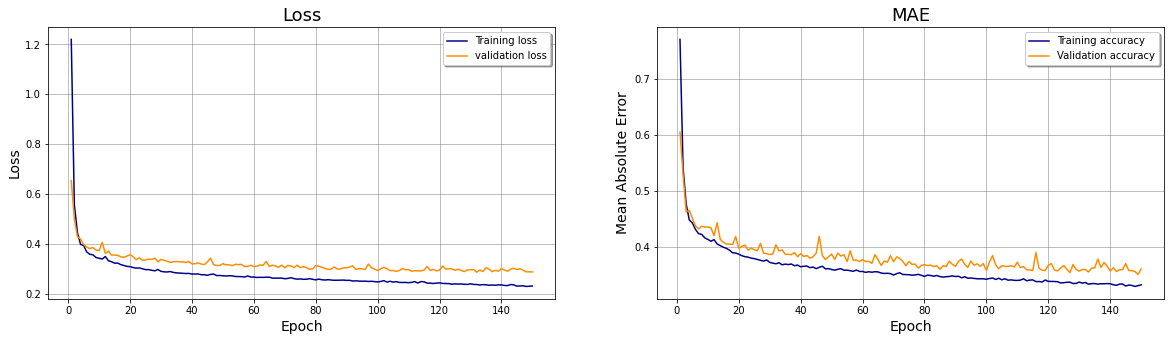

In [18]:
# Initialize the figure
width, height = 10, 5
nfig = 2
fig = plt.figure(figsize = (width*nfig,height))


# SBP 1: LOSS

ax1 = fig.add_subplot(1, nfig, 1);
ax1.plot(range(1,EPOCHS+1),history.history['loss'], color='darkblue', label="Training loss")
ax1.plot(range(1,EPOCHS+1),history.history['val_loss'], color='darkorange', label="validation loss",axes =ax1)

ax1.legend(loc='best', shadow=True)
ax1.set_xlabel('Epoch',fontsize=14);
ax1.set_ylabel('Loss',fontsize=14);
ax1.set_title('Loss',fontsize=18);
ax1.grid(color='grey', linestyle='-', linewidth=0.5);


# SBP 1: MAE

ax2 = fig.add_subplot(1, nfig, 2);
ax2.plot(range(1,EPOCHS+1),history.history['mean_absolute_error'], color='darkblue', label="Training accuracy")
ax2.plot(range(1,EPOCHS+1),history.history['val_mean_absolute_error'], color='darkorange',label="Validation accuracy")

ax2.legend(loc='best', shadow=True)
ax2.set_xlabel('Epoch',fontsize=14);
ax2.set_ylabel('Mean Absolute Error',fontsize=14);
ax2.set_title('MAE',fontsize=18);
ax2.grid(color='grey', linestyle='-', linewidth=0.5);

# plt.suptitle("Stats on Training set",fontsize=25)
# plt.subplots_adjust(top=0.8) # change title position

plt.show()

### **Evaluate the model: stats on Test set**

In [19]:
def root_mean_squared_error(y_true, y_pred):
        return  np.sqrt(np.mean((y_pred-y_true)**2))

In [20]:
# Compute LOSS and MAE on Test set
loss, mae = model.evaluate(X_test, y_test, verbose = 0); # 133/133 because it's the number of batches:
                                                                   # X_test.shape[0]/32 (default batch_size = 32)

In [21]:
# Compute RMSE on Test set
y_pred = model.predict(X_test)

A = y_test.values     # convert into a numpy array
B = y_pred.flatten()  # to get rid off the multiple brackets returned by predict method

rmse = root_mean_squared_error(A, B)

In [22]:
print(f"- Statistics on the Test set:\n\
\t* Test Loss: {loss}\n\
\t* Test MAE: {mae}\n\
\t* Test RMSE: {rmse}"
)

- Statistics on the Test set:
	* Test Loss: 0.28063756227493286
	* Test MAE: 0.3570708632469177
	* Test RMSE: 0.5297523838074338


<div class="alert alert-warning" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Warning: we don't store these results now, because we perform the same model below.
            </strong> 
        </div>   
    </div> 
</div>

## **4. Test the following network structures and compare the results in terms of training/validation MAE/loss, RMSE on test set:**
* 1 layer containing a single neuron
* 1 layer containing 3 neurons
* 1 layer containing 10 neurons
* 2 layers containing respectively 10 and 30 neurons
* 3 layers containing respectively 10, 30 and 40 neurons

In [23]:
def create_model(network):
    
    num_layers = len(network)
    
    model = Sequential()

    # Input Layer
    model.add(Dense(network[0], input_dim=X_train.shape[1], activation='relu'))

    # Hidden Layers
    if num_layers > 1:
        for i in range(1,num_layers):            
            model.add(Dense(network[i], activation='relu'))

    # Output Layer
    model.add(Dense(1))
    
    return model

In [24]:
def get_test_stats(model, xtest, ytest, verbose_flag):
    
    # Compute LOSS and MAE on Test set
    loss, mae = model.evaluate(xtest, ytest, verbose = verbose_flag);
    
    # Compute RMSE on Test set
    y_pred = model.predict(xtest)
    rmse = root_mean_squared_error(y_test.values, y_pred.flatten())
    
    return loss, mae, rmse, y_pred

In [25]:
DOE = [[1], [3], [10], [10,30], [10,30,40]] #Design of experiment

In [26]:
from time import time

# Store the info in order to compare the results with the following models.
training_loss, training_MAE = [], []
val_loss, val_MAE = [], []
test_loss, test_MAE, test_RMSE = [], [], []
net_struct, net_epochs, pred_list = [], [], [] #info about the network setting

print(f"Now we preform {len(DOE)} ANN models.\n")

for network in DOE:
     
    idx = DOE.index(network) # we consider as "MODEL #0" the one shown above!
    
    print(150*"=")
    print(f"[INFO] MODEL #{idx+1} using {DOE[idx]} neurons. [{idx+1}/{len(DOE)}]\n")
    custom_model = create_model(network)
  
    ## Compile the model
    custom_model.compile(optimizer ='adam',loss = 'mean_squared_error', metrics=[metrics.mae])

    ## Train model on full train set, with 80/20 CV split
    print(f"[INFO] Fitting using {EPOCHS} epochs...")
    print(f"Train on {X_train.shape[0]} samples, validate on {X_val.shape[0]} samples.")
    tstart = time()
    custom_history = custom_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=EPOCHS,
                        batch_size=32,
                        verbose = 0)
    tend = time() - tstart
    print(f"\n...OK, fitted the model in {tend}s.")
    
    ## Summary
    print("\n[INFO] Summary:")
    custom_model.summary()
    
    ## Test set statistics
    print("\n[INFO] Evaluate the model on Test set:")
    loss, mae, rmse, y_pred = get_test_stats(custom_model, X_test, y_test, verbose_flag = 1)
    
    print('\n[INFO] Statistics:\
\n- Stats on Training set:',
'\n\t* Loss:\t\t', custom_history.history['loss'][-1],
'\n\t* MAE:\t\t', custom_history.history['mean_absolute_error'][-1],
'\n- Stats on Validation set:',
'\n\t* loss:\t\t', custom_history.history['val_loss'][-1],
'\n\t* MAE:\t\t', custom_history.history['val_mean_absolute_error'][-1],
'\n- Stats on Test set:',
'\n\t* loss:\t\t', loss,
'\n\t* MAE:\t\t', mae,
'\n\t* RMSE:\t\t', rmse,
    )
    
    ## Store all the statistics
    # store training info
    training_loss.append(custom_history.history['loss'])
    training_MAE.append(custom_history.history['mean_absolute_error'])

    # store val info
    val_loss.append(custom_history.history['val_loss'])
    val_MAE.append(custom_history.history['val_mean_absolute_error'])

    # store test info
    test_loss.append(loss)
    test_MAE.append(mae)
    test_RMSE.append(rmse)
    
    #structure of the network
    net_struct.append(DOE[idx])
    net_epochs.append(EPOCHS)
    pred_list.append(y_pred)

    print(150*"=")
    print("\n")
    
print(f"Performed all the {len(DOE)} models.")

Now we preform 5 ANN models.

[INFO] MODEL #1 using [1] neurons. [1/5]

[INFO] Fitting using 150 epochs...
Train on 13108 samples, validate on 3277 samples.

...OK, fitted the model in 77.82189750671387s.

[INFO] Summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________

[INFO] Evaluate the model on Test set:
133/133 [==============================] - 0s 1ms/step - loss: 0.4358 - mean_absolute_error: 0.4806

[INFO] Statistics:
- Stats on Training set: 
	* Loss:		 0.4217461049556732 
	* MAE:		 0.4714258015155792 
- Stats on Validation set: 
	* loss:		 0.4540494978

<div class="alert alert-warning" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong>Warning: pay attention to running multiple times the above cell, because you append other results on the final statistics.
            </strong> 
        </div>   
    </div> 
</div>

In [27]:
# Collect all the most useful data into a DataFrame
stats = pd.DataFrame({
    'ANN_structure': net_struct,
    'ANN_epochs': net_epochs,
    'Training Loss': [last for *_, last in training_loss],
    'Training MAE': [last for *_, last in training_MAE],
    'Validation Loss': [last for *_, last in val_loss],
    'Validation MAE': [last for *_, last in val_MAE],
    'Test Loss': test_loss,
    'Test MAE': test_MAE,
    'Test RMSE': test_RMSE
})
stats

,ANN_structure,ANN_epochs,Training Loss,Training MAE,Validation Loss,Validation MAE,Test Loss,Test MAE,Test RMSE
0,[1],150,0.421746,0.471426,0.454049,0.483403,0.435833,0.480550,0.660177
1,[3],150,0.372986,0.437562,0.405804,0.448418,0.384103,0.451114,0.619760
2,[10],150,0.319872,0.398626,0.359499,0.417824,0.348028,0.418218,0.589939
3,"[10, 30]",150,0.261056,0.350203,0.307047,0.368865,0.299178,0.371206,0.546971
4,"[10, 30, 40]",150,0.239802,0.333529,0.308254,0.359592,0.298137,0.361128,0.546019


## **5. Generate a chart in which the performance of these models are displayed and compared**

## **Compare the results**

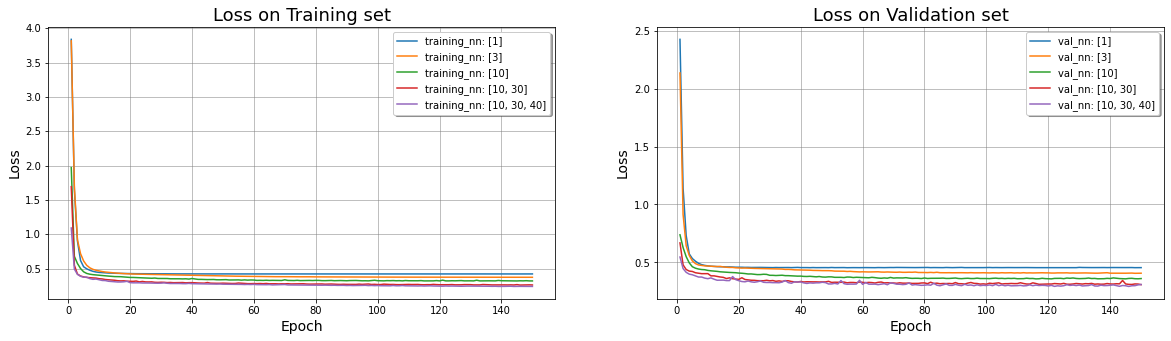

In [28]:
# Initialize the figure
width, height = 10, 5
nfig = 2
fig = plt.figure(figsize = (width*nfig,height))


# SBP 1: LOSS on Training set
ax1 = fig.add_subplot(1, nfig, 1);
for i in range(0,len(DOE)):
    ax1.plot(range(1,EPOCHS+1), training_loss[i], label="training_nn: " + str(net_struct[i]))
ax1.legend(loc='best', shadow=True)
ax1.set_xlabel('Epoch',fontsize=14);
ax1.set_ylabel('Loss',fontsize=14);
ax1.set_title('Loss on Training set',fontsize=18);
ax1.grid(color='grey', linestyle='-', linewidth=0.5);

# SBP 2: LOSS on Validation set
ax2 = fig.add_subplot(1, nfig, 2);
for i in range(0,len(DOE)):
    ax2.plot(range(1,EPOCHS+1), val_loss[i], label="val_nn: " + str(net_struct[i]))
ax2.legend(loc='best', shadow=True)
ax2.set_xlabel('Epoch',fontsize=14);
ax2.set_ylabel('Loss',fontsize=14);
ax2.set_title('Loss on Validation set',fontsize=18);
ax2.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

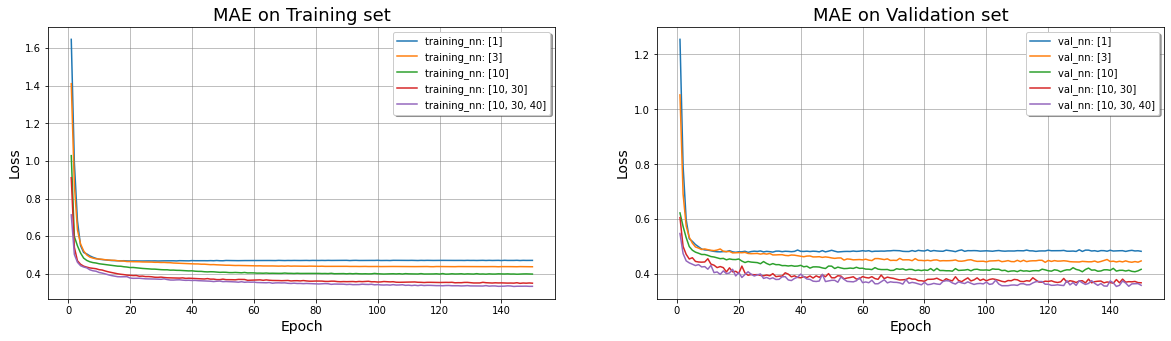

In [29]:
# Initialize the figure
width, height = 10, 5
nfig = 2
fig = plt.figure(figsize = (width*nfig,height))


# SBP 1: LOSS on Training set
ax1 = fig.add_subplot(1, nfig, 1);
for i in range(0,len(DOE)):
    ax1.plot(range(1,EPOCHS+1), training_MAE[i], label="training_nn: " + str(net_struct[i]))
ax1.legend(loc='best', shadow=True)
ax1.set_xlabel('Epoch',fontsize=14);
ax1.set_ylabel('Loss',fontsize=14);
ax1.set_title('MAE on Training set',fontsize=18);
ax1.grid(color='grey', linestyle='-', linewidth=0.5);

# SBP 2: LOSS on Validation set
ax2 = fig.add_subplot(1, nfig, 2);
for i in range(0,len(DOE)):
    ax2.plot(range(1,EPOCHS+1), val_MAE[i], label="val_nn: " + str(net_struct[i]))
ax2.legend(loc='best', shadow=True)
ax2.set_xlabel('Epoch',fontsize=14);
ax2.set_ylabel('Loss',fontsize=14);
ax2.set_title('MAE on Validation set',fontsize=18);
ax2.grid(color='grey', linestyle='-', linewidth=0.5);

plt.show()

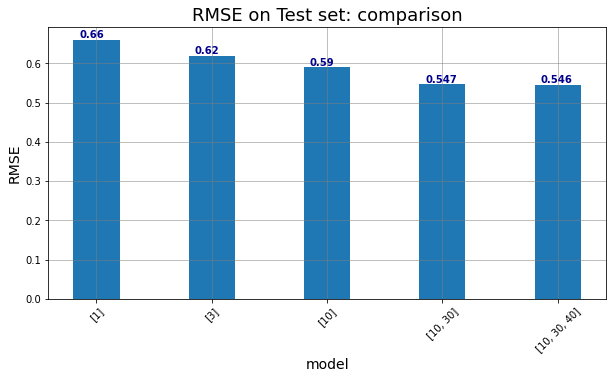

In [30]:
# Initialize the figure
width, height = 10, 5
fig = plt.figure(figsize = (width,height))

ax1 = fig.add_subplot(1, 1, 1);
ax1.bar(range(1,len(DOE)+1), test_RMSE,width=0.4)

ax1.set_xlabel('model',fontsize=14);
ax1.set_ylabel('RMSE',fontsize=14);
ax1.set_title('RMSE on Test set: comparison',fontsize=18);
ax1.grid(color='grey', linestyle='-', linewidth=0.5);

# change the x-axis
xrange = [1,2,3,4,5]
squad = net_struct
ax1.set_xticks(xrange)
ax1.set_xticklabels(squad, minor=False, rotation=45)

for xx,yy in zip(xrange,test_RMSE):
    ax1.text(xx -0.15, yy + .005, str(test_RMSE[xx-1].round(3)), color='darkblue', fontweight='bold')


plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


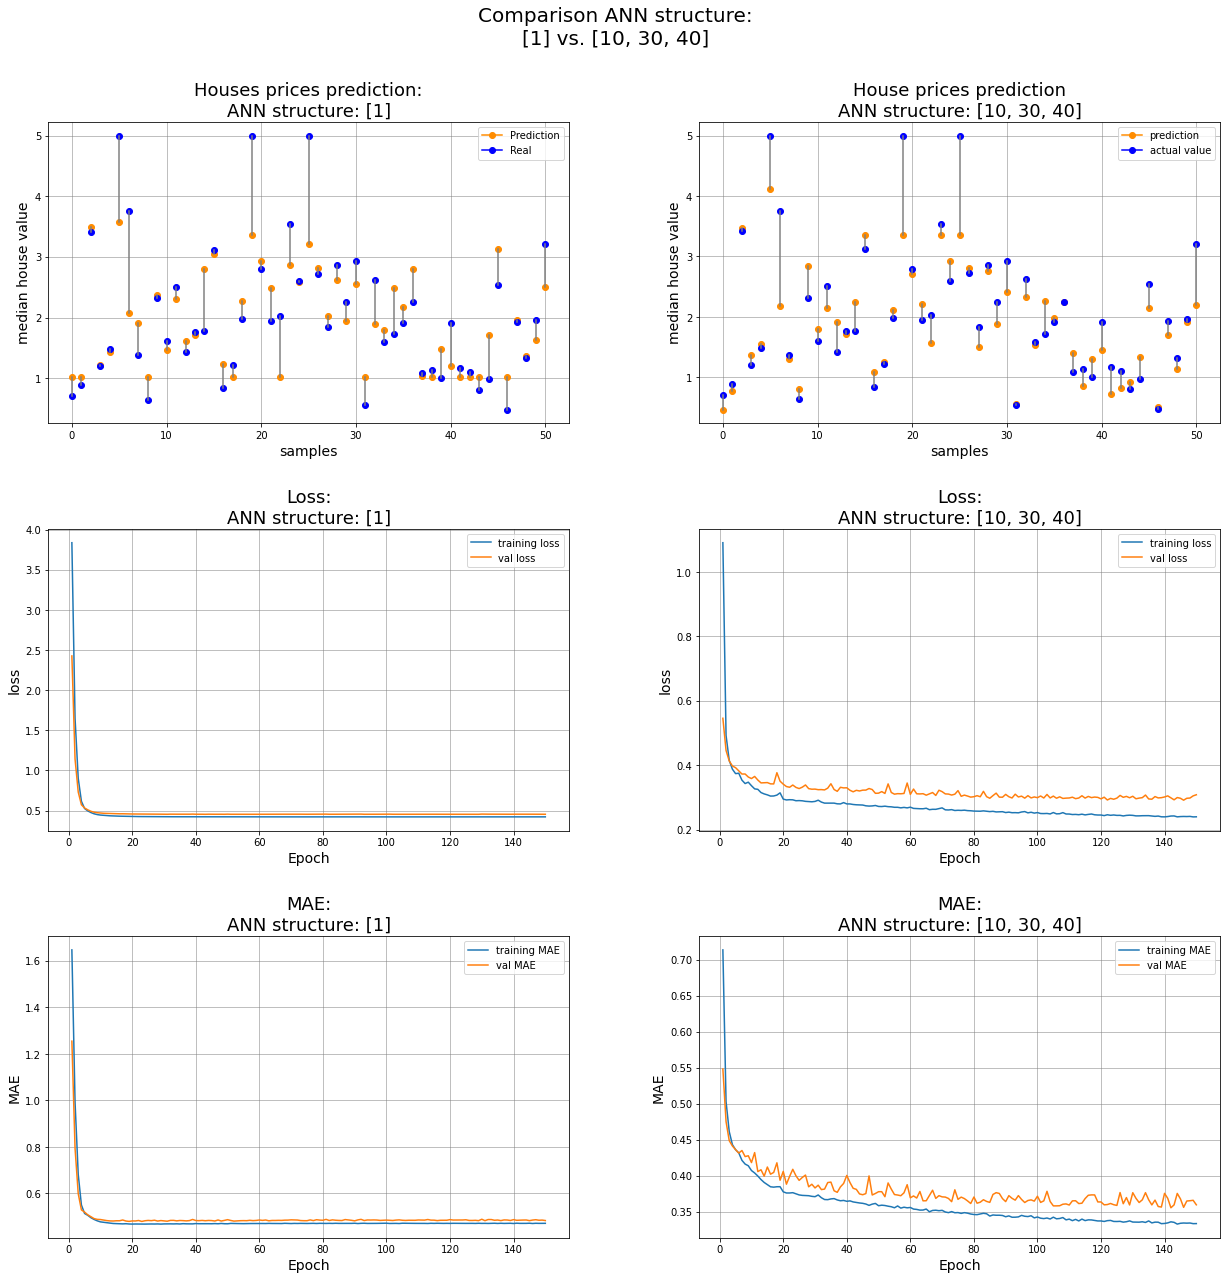

In [31]:
ns = 50 # number of samples to visualize
id_one, id_two = 0,-1 # index of the two models we want to compare

# Initialize the figure
width, height = 7, 10 # single pic
rows, columns = 3, 2
fig = plt.figure(figsize = (width*rows,height*columns))


idx_model = id_one
y_pred = pred_list[idx_model] # prediction of a certain model

## SBP 1
ax1 = fig.add_subplot(rows, columns, 1);
for i in range(0,ns+1):
    ax1.plot(i,y_pred[i], 'darkorange',marker='o')
    ax1.plot(i,y_test[i], 'b',marker='o')
    ax1.plot([i, i], [y_pred[i], y_test[i]], color='grey') # distance btw y_test and y_pred
ax1.legend(['Prediction','Real'])
ax1.set_xlabel('samples',fontsize=14);
ax1.set_ylabel('median house value',fontsize=14);
ax1.set_title(f'Houses prices prediction:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax1.grid(color='grey', linestyle='-', linewidth=0.5);

## SBP 3
ax3 = fig.add_subplot(rows, columns, 3);
ax3.plot(range(1,EPOCHS+1), training_loss[idx_model], label="training loss")
ax3.plot(range(1,EPOCHS+1), val_loss[idx_model], label="val loss")
ax3.legend()
ax3.set_xlabel('Epoch',fontsize=14);
ax3.set_ylabel('loss',fontsize=14);
ax3.set_title(f'Loss:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax3.grid(color='grey', linestyle='-', linewidth=0.5);

## SBP 5
ax5 = fig.add_subplot(rows, columns, 5);
ax5.plot(range(1,EPOCHS+1), training_MAE[idx_model], label="training MAE")
ax5.plot(range(1,EPOCHS+1), val_MAE[idx_model], label="val MAE")
ax5.legend()
ax5.set_xlabel('Epoch',fontsize=14);
ax5.set_ylabel('MAE',fontsize=14);
ax5.set_title(f'MAE:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax5.grid(color='grey', linestyle='-', linewidth=0.5);

idx_model = id_two
y_pred = pred_list[idx_model] # prediction of a certain model

## SBP 2
ax2 = fig.add_subplot(rows, columns, 2);
for i in range(0,ns+1):
    ax2.plot(i,y_pred[i], 'darkorange',marker='o')
    ax2.plot(i,y_test[i], 'b',marker='o')
    ax2.plot([i, i], [y_pred[i], y_test[i]], color='grey') # distance btw y_test and y_pred
ax2.legend(['prediction','actual value'])
ax2.set_xlabel('samples',fontsize=14);
ax2.set_ylabel('median house value',fontsize=14);
ax2.set_title(f'House prices prediction\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax2.grid(color='grey', linestyle='-', linewidth=0.5);

## SBP 4
ax4 = fig.add_subplot(rows, columns, 4);
ax4.plot(range(1,EPOCHS+1), training_loss[idx_model], label="training loss")
ax4.plot(range(1,EPOCHS+1), val_loss[idx_model], label="val loss")
ax4.legend()
ax4.set_xlabel('Epoch',fontsize=14);
ax4.set_ylabel('loss',fontsize=14);
ax4.set_title(f'Loss:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax4.grid(color='grey', linestyle='-', linewidth=0.5);

## SBP 6
ax6 = fig.add_subplot(rows, columns, 6);
ax6.plot(range(1,EPOCHS+1), training_MAE[idx_model], label="training MAE")
ax6.plot(range(1,EPOCHS+1), val_MAE[idx_model], label="val MAE")
ax6.legend()
ax6.set_xlabel('Epoch',fontsize=14);
ax6.set_ylabel('MAE',fontsize=14);
ax6.set_title(f'MAE:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax6.grid(color='grey', linestyle='-', linewidth=0.5);

# set the spacing between subplots
plt.suptitle(f"Comparison ANN structure:\n{net_struct[id_one]} vs. {net_struct[id_two]}", fontsize=20)
plt.subplots_adjust(top=0.9,
                    wspace=0.25, 
                    hspace=0.35)

plt.show()

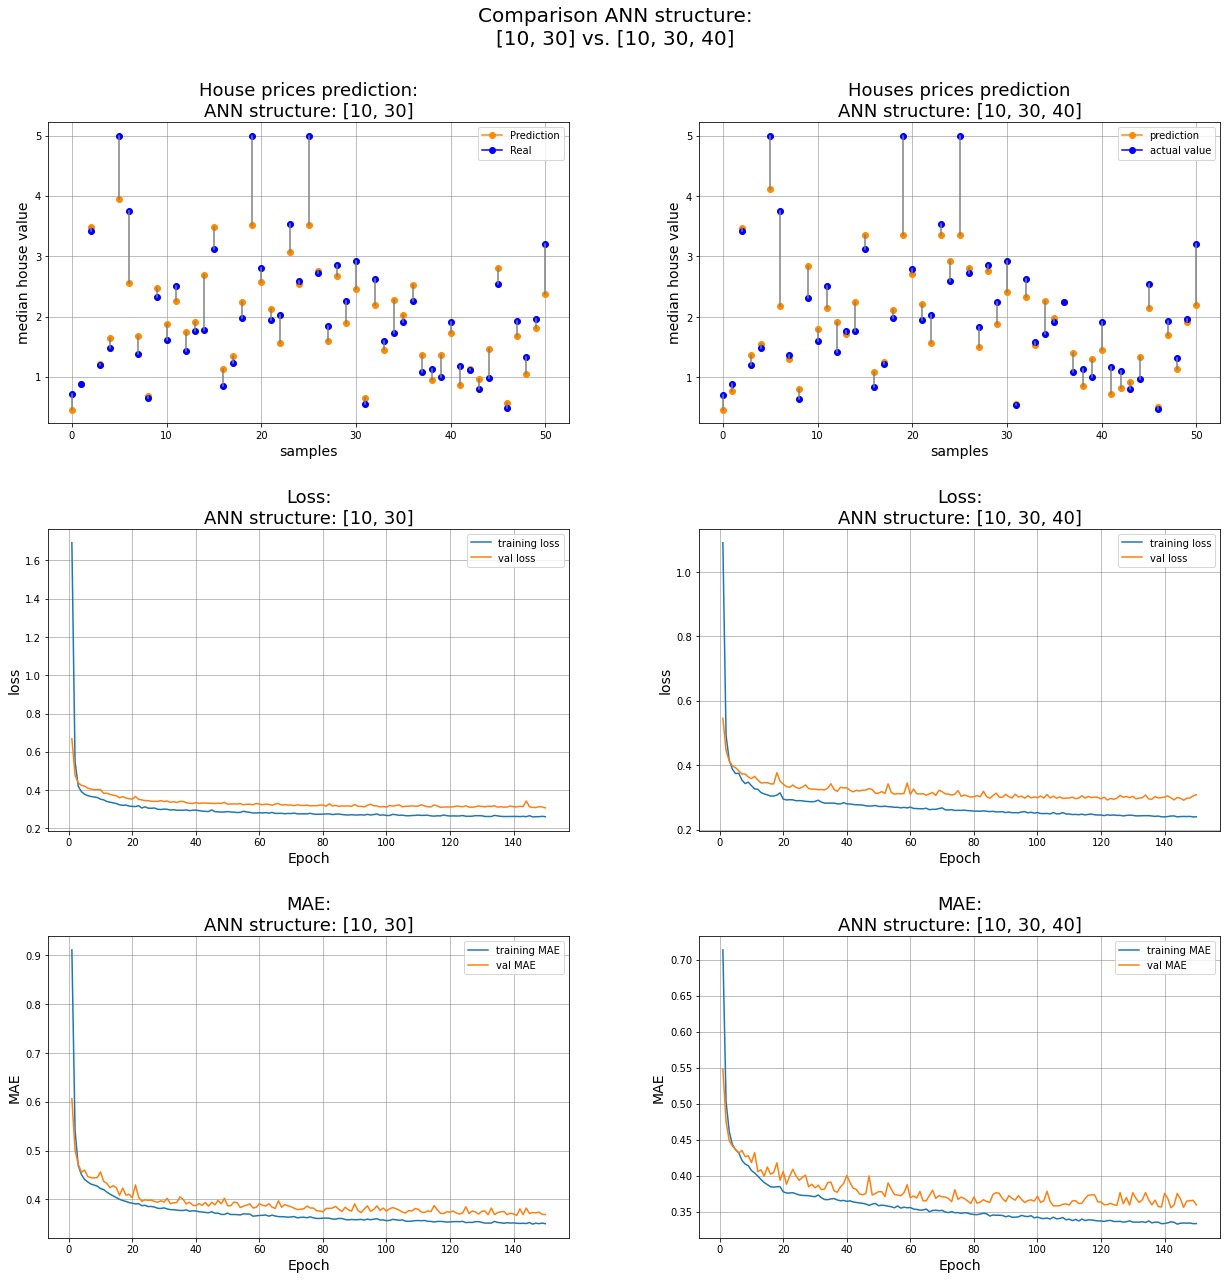

In [32]:
ns = 50 # number of samples to visualize
id_one, id_two = -2,-1 # index of the two models we want to compare

# Initialize the figure
width, height = 7, 10 # single pic
rows, columns = 3, 2
fig = plt.figure(figsize = (width*rows,height*columns))

idx_model = id_one
y_pred = pred_list[idx_model] # prediction of a certain model

## SBP 1
ax1 = fig.add_subplot(rows, columns, 1);
for i in range(0,ns+1):
    ax1.plot(i,y_pred[i], 'darkorange',marker='o')
    ax1.plot(i,y_test[i], 'b',marker='o')
    ax1.plot([i, i], [y_pred[i], y_test[i]], color='grey') # distance btw y_test and y_pred
ax1.legend(['Prediction','Real'])
ax1.set_xlabel('samples',fontsize=14);
ax1.set_ylabel('median house value',fontsize=14);
ax1.set_title(f'House prices prediction:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax1.grid(color='grey', linestyle='-', linewidth=0.5);

## SBP 3
ax3 = fig.add_subplot(rows, columns, 3);
ax3.plot(range(1,EPOCHS+1), training_loss[idx_model], label="training loss")
ax3.plot(range(1,EPOCHS+1), val_loss[idx_model], label="val loss")
ax3.legend()
ax3.set_xlabel('Epoch',fontsize=14);
ax3.set_ylabel('loss',fontsize=14);
ax3.set_title(f'Loss:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax3.grid(color='grey', linestyle='-', linewidth=0.5);

## SBP 5
ax5 = fig.add_subplot(rows, columns, 5);
ax5.plot(range(1,EPOCHS+1), training_MAE[idx_model], label="training MAE")
ax5.plot(range(1,EPOCHS+1), val_MAE[idx_model], label="val MAE")
ax5.legend()
ax5.set_xlabel('Epoch',fontsize=14);
ax5.set_ylabel('MAE',fontsize=14);
ax5.set_title(f'MAE:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax5.grid(color='grey', linestyle='-', linewidth=0.5);

idx_model = id_two
y_pred = pred_list[idx_model] # prediction of a certain model

## SBP 2
ax2 = fig.add_subplot(rows, columns, 2);
for i in range(0,ns+1):
    ax2.plot(i,y_pred[i], 'darkorange',marker='o')
    ax2.plot(i,y_test[i], 'b',marker='o')
    ax2.plot([i, i], [y_pred[i], y_test[i]], color='grey') # distance btw y_test and y_pred
ax2.legend(['prediction','actual value'])
ax2.set_xlabel('samples',fontsize=14);
ax2.set_ylabel('median house value',fontsize=14);
ax2.set_title(f'Houses prices prediction\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax2.grid(color='grey', linestyle='-', linewidth=0.5);

## SBP 4
ax4 = fig.add_subplot(rows, columns, 4);
ax4.plot(range(1,EPOCHS+1), training_loss[idx_model], label="training loss")
ax4.plot(range(1,EPOCHS+1), val_loss[idx_model], label="val loss")
ax4.legend()
ax4.set_xlabel('Epoch',fontsize=14);
ax4.set_ylabel('loss',fontsize=14);
ax4.set_title(f'Loss:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax4.grid(color='grey', linestyle='-', linewidth=0.5);

## SBP 6
ax6 = fig.add_subplot(rows, columns, 6);
ax6.plot(range(1,EPOCHS+1), training_MAE[idx_model], label="training MAE")
ax6.plot(range(1,EPOCHS+1), val_MAE[idx_model], label="val MAE")
ax6.legend()
ax6.set_xlabel('Epoch',fontsize=14);
ax6.set_ylabel('MAE',fontsize=14);
ax6.set_title(f'MAE:\nANN structure: {net_struct[idx_model]}',fontsize=18);
ax6.grid(color='grey', linestyle='-', linewidth=0.5);

# set the spacing between subplots
plt.suptitle(f"Comparison ANN structure:\n{net_struct[id_one]} vs. {net_struct[id_two]}", fontsize=20)
plt.subplots_adjust(top=0.9,
                    wspace=0.25, 
                    hspace=0.35)

plt.show()